## Forecast the sales for 1 year for the furniture products category on the basis of the historical data ##

* A time-series data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.
* Time-Series Forecasting is the process of using a statistical model to predict future values of a time-series based on past results.
* A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.
* Applications of time series are used in statistics, finance or business applications.


### Patterns in a Time Series
**Trend**
A trend is observed when there is an increasing or decreasing slope observed in the time series. 

**Seasonality**
A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.  

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
#Importing data
df = pd.read_excel(r"C:\Users\lenovo\Downloads\Sample - Superstore.xls",header=0)
#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [5]:
df.shape

(10194, 21)

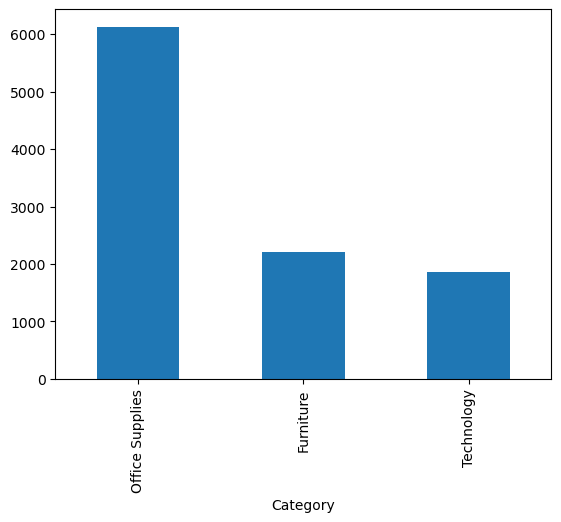

In [6]:
df["Category"].value_counts().plot(kind="bar");

### Filtering the data based on Furniture category

In [8]:
furniture = df[df['Category'] == 'Furniture']
furniture.shape

(2201, 21)

In [9]:
furniture.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State/Province            object
Postal Code               object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
dtype: object

In [10]:
#If the date is not in actualy date format below code can be used.

#furniture['Order Date']=pd.to_datetime(furniture['Order Date'])

In [11]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2019-01-06 00:00:00'), Timestamp('2022-12-30 00:00:00'))

The data available is from Jan 2019 to Dec 2022 for analysis

### 1. Single Dimensional Data

In [14]:
furniture=furniture[["Order Date","Sales"]]
furniture

,Order Date,Sales
5,2019-01-06,2573.820
14,2019-01-07,76.728
18,2019-01-10,51.940
20,2019-01-11,9.940
21,2019-01-13,333.999
...,...,...
10175,2022-12-29,101.120
10176,2022-12-29,68.460
10183,2022-12-29,99.120
10184,2022-12-29,68.460


In [15]:
furniture.head(10)

,Order Date,Sales
5,2019-01-06,2573.820
14,2019-01-07,76.728
18,2019-01-10,51.940
20,2019-01-11,9.940
21,2019-01-13,333.999
22,2019-01-13,545.940
32,2019-01-14,61.960
34,2019-01-16,127.104
39,2019-01-19,181.470
43,2019-01-20,1067.940


### 2. Sorting the date/time into chronological order

In [17]:
furniture = furniture.sort_values('Order Date',ascending=True)
furniture.isnull().sum()
furniture

,Order Date,Sales
5,2019-01-06,2573.820
14,2019-01-07,76.728
18,2019-01-10,51.940
20,2019-01-11,9.940
21,2019-01-13,333.999
...,...,...
10173,2022-12-29,393.568
10172,2022-12-29,1207.840
10171,2022-12-29,258.750
10174,2022-12-29,300.980


In [18]:
furniture.head(30)

,Order Date,Sales
5,2019-01-06,2573.820
14,2019-01-07,76.728
18,2019-01-10,51.940
20,2019-01-11,9.940
21,2019-01-13,333.999
22,2019-01-13,545.940
32,2019-01-14,61.960
34,2019-01-16,127.104
39,2019-01-19,181.470
43,2019-01-20,1067.940


In [19]:
furniture["Order Date"].value_counts()

Order Date
2021-09-05    10
2021-12-01     9
2022-10-30     9
2022-11-19     9
2021-12-25     9
              ..
2020-11-22     1
2020-11-19     1
2020-11-15     1
2020-11-10     1
2022-12-30     1
Name: count, Length: 896, dtype: int64

### 3. Grouping the data based on date/time

In [21]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2019-01-06,2573.8200
1,2019-01-07,76.7280
2,2019-01-10,51.9400
3,2019-01-11,9.9400
4,2019-01-13,879.9390
...,...,...
891,2022-12-24,1393.4940
892,2022-12-25,832.4540
893,2022-12-28,551.2568
894,2022-12-29,2498.2980


In [22]:
furniture.head(30)

,Order Date,Sales
0,2019-01-06,2573.820
1,2019-01-07,76.728
2,2019-01-10,51.940
3,2019-01-11,9.940
4,2019-01-13,879.939
5,2019-01-14,61.960
6,2019-01-16,127.104
7,2019-01-19,181.470
8,2019-01-20,1413.510
9,2019-01-21,90.428


### 4,. Set date/time as index of the data

In [24]:
furniture = furniture.set_index('Order Date')

In [25]:
furniture.head(10)

,Sales
Order Date,
2019-01-06,2573.820
2019-01-07,76.728
2019-01-10,51.940
2019-01-11,9.940
2019-01-13,879.939
2019-01-14,61.960
2019-01-16,127.104
2019-01-19,181.470
2019-01-20,1413.510


In [26]:
furniture.shape

(896, 1)

### 5. Equally spaced date/time

In [28]:
y = furniture['Sales'].resample("MS").mean()
y

Order Date
2019-01-01     485.208077
2019-02-01     367.931600
2019-03-01     878.714222
2019-04-01     567.488357
2019-05-01     531.537937
2019-06-01     695.059242
2019-07-01     601.169500
2019-08-01     457.521656
2019-09-01     992.353367
2019-10-01     729.791278
2019-11-01     989.232395
2019-12-01    1507.037452
2020-01-01     908.086277
2020-02-01     522.395667
2020-03-01     858.917438
2020-04-01     805.822962
2020-05-01     627.923367
2020-06-01     428.565500
2020-07-01     719.706316
2020-08-01     602.412012
2020-09-01    1382.790684
2020-10-01     632.980184
2020-11-01    1286.701354
2020-12-01    1023.734922
2021-01-01     512.528200
2021-02-01     356.868273
2021-03-01     672.204095
2021-04-01     699.537368
2021-05-01     689.078409
2021-06-01     826.932625
2021-07-01     771.537353
2021-08-01     734.307782
2021-09-01    1138.618704
2021-10-01     625.714158
2021-11-01    1271.345152
2021-12-01    1421.911346
2022-01-01     401.947467
2022-02-01     528.179800
2

In [29]:
y.shape

(48,)

In [30]:
y

Order Date
2019-01-01     485.208077
2019-02-01     367.931600
2019-03-01     878.714222
2019-04-01     567.488357
2019-05-01     531.537937
2019-06-01     695.059242
2019-07-01     601.169500
2019-08-01     457.521656
2019-09-01     992.353367
2019-10-01     729.791278
2019-11-01     989.232395
2019-12-01    1507.037452
2020-01-01     908.086277
2020-02-01     522.395667
2020-03-01     858.917438
2020-04-01     805.822962
2020-05-01     627.923367
2020-06-01     428.565500
2020-07-01     719.706316
2020-08-01     602.412012
2020-09-01    1382.790684
2020-10-01     632.980184
2020-11-01    1286.701354
2020-12-01    1023.734922
2021-01-01     512.528200
2021-02-01     356.868273
2021-03-01     672.204095
2021-04-01     699.537368
2021-05-01     689.078409
2021-06-01     826.932625
2021-07-01     771.537353
2021-08-01     734.307782
2021-09-01    1138.618704
2021-10-01     625.714158
2021-11-01    1271.345152
2021-12-01    1421.911346
2022-01-01     401.947467
2022-02-01     528.179800
2

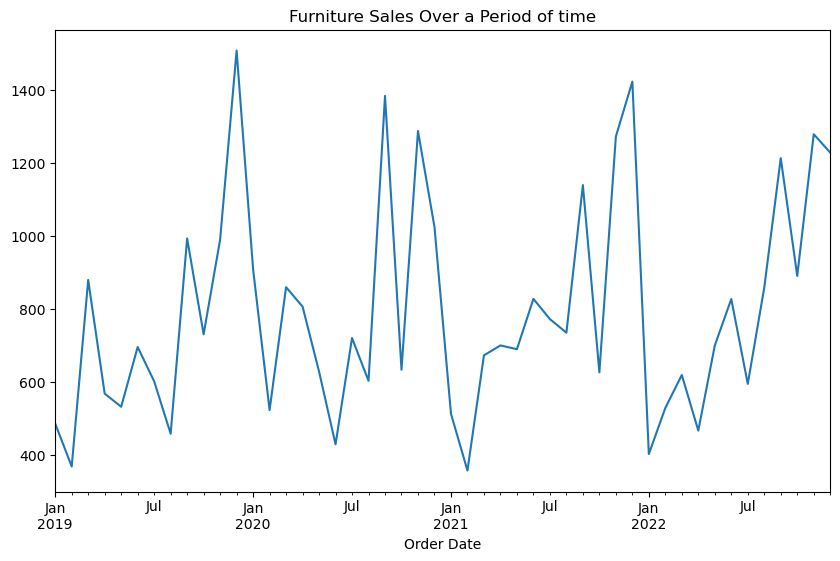

In [31]:
y.plot(figsize=(10, 6))
plt.title("Furniture Sales Over a Period of time")
plt.show()

In [32]:
y

Order Date
2019-01-01     485.208077
2019-02-01     367.931600
2019-03-01     878.714222
2019-04-01     567.488357
2019-05-01     531.537937
2019-06-01     695.059242
2019-07-01     601.169500
2019-08-01     457.521656
2019-09-01     992.353367
2019-10-01     729.791278
2019-11-01     989.232395
2019-12-01    1507.037452
2020-01-01     908.086277
2020-02-01     522.395667
2020-03-01     858.917438
2020-04-01     805.822962
2020-05-01     627.923367
2020-06-01     428.565500
2020-07-01     719.706316
2020-08-01     602.412012
2020-09-01    1382.790684
2020-10-01     632.980184
2020-11-01    1286.701354
2020-12-01    1023.734922
2021-01-01     512.528200
2021-02-01     356.868273
2021-03-01     672.204095
2021-04-01     699.537368
2021-05-01     689.078409
2021-06-01     826.932625
2021-07-01     771.537353
2021-08-01     734.307782
2021-09-01    1138.618704
2021-10-01     625.714158
2021-11-01    1271.345152
2021-12-01    1421.911346
2022-01-01     401.947467
2022-02-01     528.179800
2

### Train Test split - Manually

In [34]:
#Training Data
train=y.loc[:'2021-12-01']
train.tail()
train.shape

(36,)

In [35]:
test=y.loc['2022-01-01':]
test.head()
test.shape

(12,)

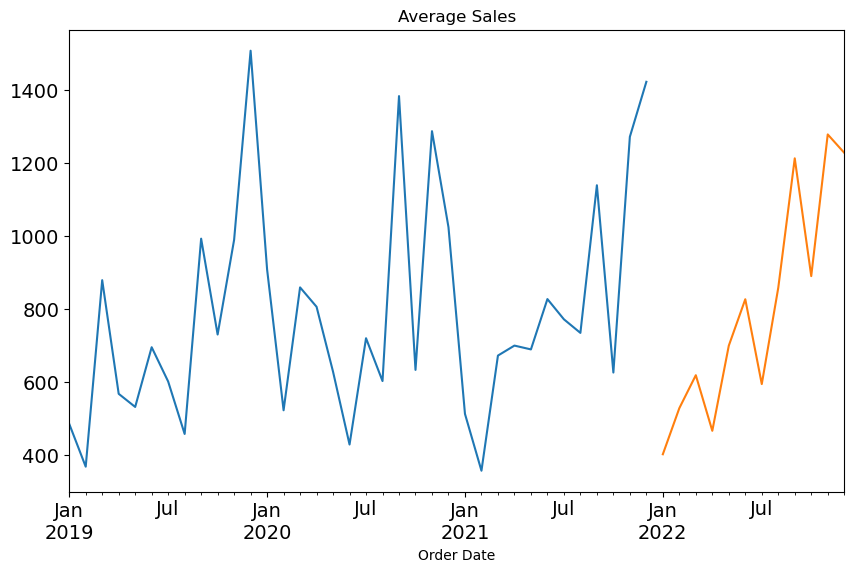

In [36]:
#Plotting data
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

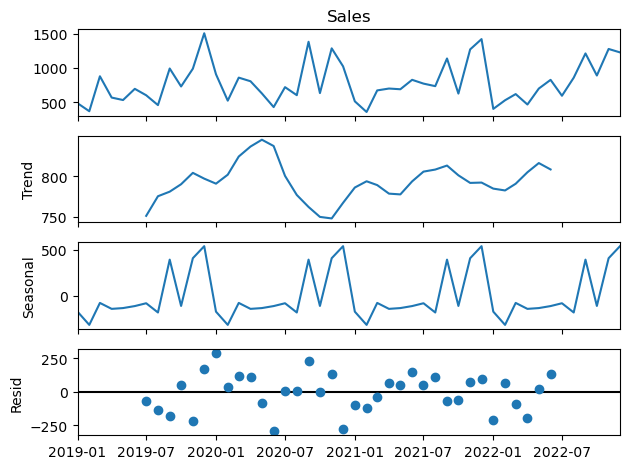

In [37]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


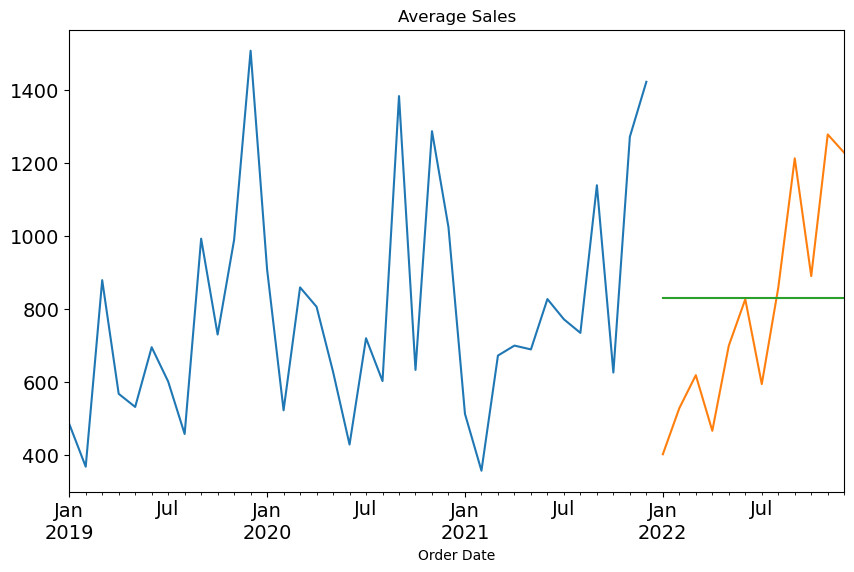

In [38]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.07)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [39]:
Exp_Smooth.SES

2022-01-01    829.399859
2022-02-01    829.399859
2022-03-01    829.399859
2022-04-01    829.399859
2022-05-01    829.399859
2022-06-01    829.399859
2022-07-01    829.399859
2022-08-01    829.399859
2022-09-01    829.399859
2022-10-01    829.399859
2022-11-01    829.399859
2022-12-01    829.399859
Freq: MS, dtype: float64

In [40]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

419.6578709070872

In [41]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

293.38834714019725


C:\Users\lenovo\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


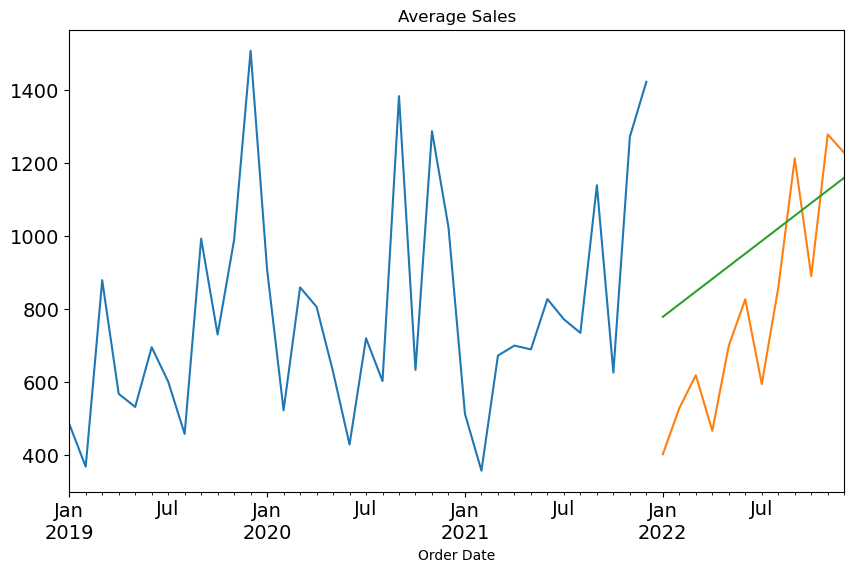

In [42]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_trend = 0.4)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [43]:
fit1.aic

448.11854872749

In [44]:
Holt_df['Holt_linear']

2022-01-01     778.320212
2022-02-01     812.948471
2022-03-01     847.576730
2022-04-01     882.204988
2022-05-01     916.833247
2022-06-01     951.461505
2022-07-01     986.089764
2022-08-01    1020.718023
2022-09-01    1055.346281
2022-10-01    1089.974540
2022-11-01    1124.602799
2022-12-01    1159.231057
Freq: MS, dtype: float64

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test,Holt_df['Holt_linear'] ))
print(rms)

255.65400186888743


In [46]:
import warnings 
warnings.filterwarnings("ignore")

In [47]:
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #smoothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic

In [48]:
for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])

(0.49, 0.13) : 427.18295506468075


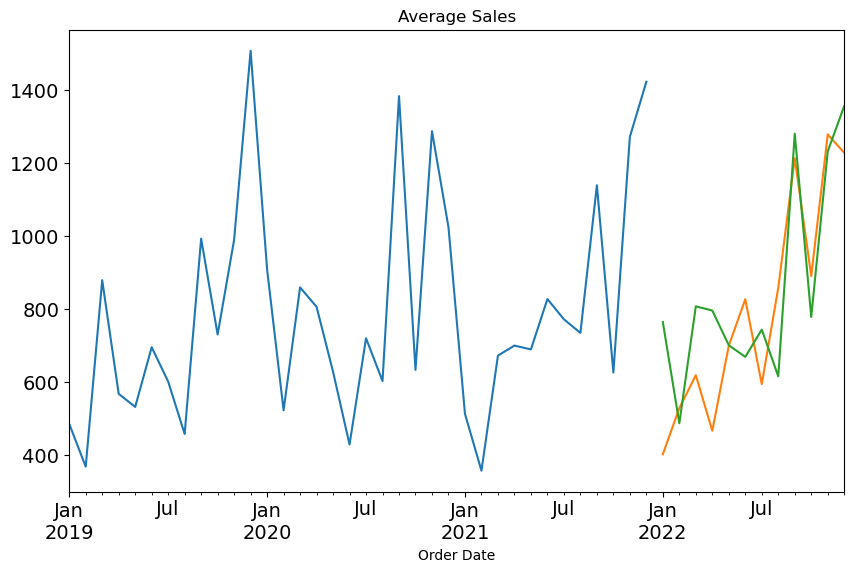

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [50]:
fit1.aic

387.3482278463962

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

186.73702260269678


In [52]:
Holt_Winter_df['Holt_Winter']

2022-01-01     763.963508
2022-02-01     486.893065
2022-03-01     806.961784
2022-04-01     795.575171
2022-05-01     700.479510
2022-06-01     668.572919
2022-07-01     743.323177
2022-08-01     615.332817
2022-09-01    1279.877141
2022-10-01     777.943209
2022-11-01    1231.442712
2022-12-01    1355.581396
Freq: MS, dtype: float64

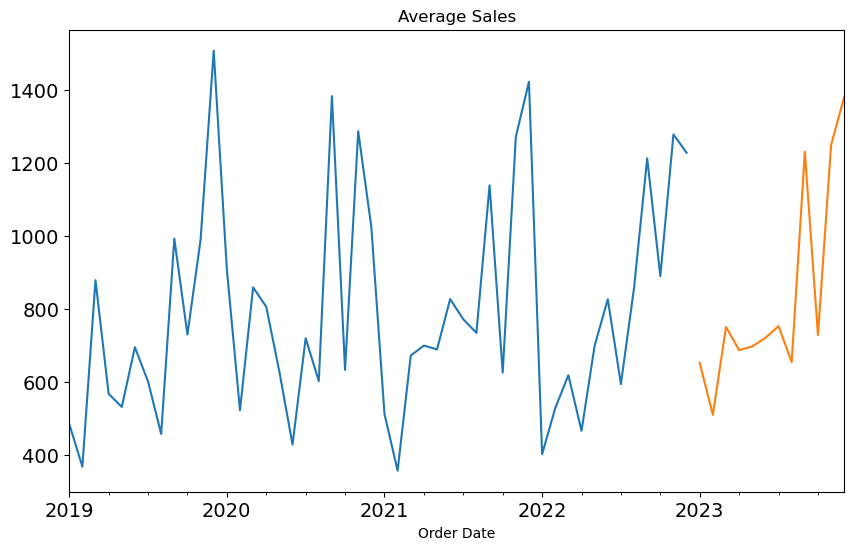

In [53]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [54]:
Y_predictions

2023-01-01     652.118126
2023-02-01     509.879808
2023-03-01     750.633715
2023-04-01     687.163879
2023-05-01     697.345455
2023-06-01     720.850679
2023-07-01     752.701536
2023-08-01     654.349320
2023-09-01    1230.077589
2023-10-01     728.459778
2023-11-01    1248.453729
2023-12-01    1380.770523
Freq: MS, dtype: float64

In [55]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx", header=["Sales"], index=True)

### ARIMA - Auto Regressive Integrated Moving Average
* ARIMA stands for Autoregressive Integrated Moving Average Model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.
* So, ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.
* ARIMA Models are specified by three order parameters: (p, d, q),
where,

* p is the order of the AR term

* q is the order of the MA term

* d is the number of differencing required to make the time series stationary

* **AR(p) Autoregression** – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
* **I(d) Integration** – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
* **MA(q) Moving Average** – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

#### Types of ARIMA Model
**ARIMA** : Non-seasonal Autoregressive Integrated Moving Averages  
**SARIMA** : Seasonal ARIMA  
**SARIMAX** : Seasonal ARIMA with exogenous variables  
If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.

In [58]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [59]:
#p+q+P+Q<=10
#p+q<=3

In [60]:
#pip install pmdarima --user

In [61]:
!pip install pmdarima

In [62]:
import pmdarima as pm

In [63]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=522.301, Time=0.11 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=498.477, Time=0.22 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=498.013, Time=0.08 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=497.374, Time=0.25 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(1,2,0)(0,1,2)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(1,2,0)(1,1,2)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(2,2,1)(0,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(1,2,0)(0,1,1)[12] intercept   : AIC=499.372, Time=0.35 sec

Best model:  ARIMA(1,2,0)(0,1,1)[12]          
Total fit time: 6.021 seconds


In [64]:
model.aic()

497.3737034501202

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

In [66]:
y

Order Date
2019-01-01     485.208077
2019-02-01     367.931600
2019-03-01     878.714222
2019-04-01     567.488357
2019-05-01     531.537937
2019-06-01     695.059242
2019-07-01     601.169500
2019-08-01     457.521656
2019-09-01     992.353367
2019-10-01     729.791278
2019-11-01     989.232395
2019-12-01    1507.037452
2020-01-01     908.086277
2020-02-01     522.395667
2020-03-01     858.917438
2020-04-01     805.822962
2020-05-01     627.923367
2020-06-01     428.565500
2020-07-01     719.706316
2020-08-01     602.412012
2020-09-01    1382.790684
2020-10-01     632.980184
2020-11-01    1286.701354
2020-12-01    1023.734922
2021-01-01     512.528200
2021-02-01     356.868273
2021-03-01     672.204095
2021-04-01     699.537368
2021-05-01     689.078409
2021-06-01     826.932625
2021-07-01     771.537353
2021-08-01     734.307782
2021-09-01    1138.618704
2021-10-01     625.714158
2021-11-01    1271.345152
2021-12-01    1421.911346
2022-01-01     401.947467
2022-02-01     528.179800
2

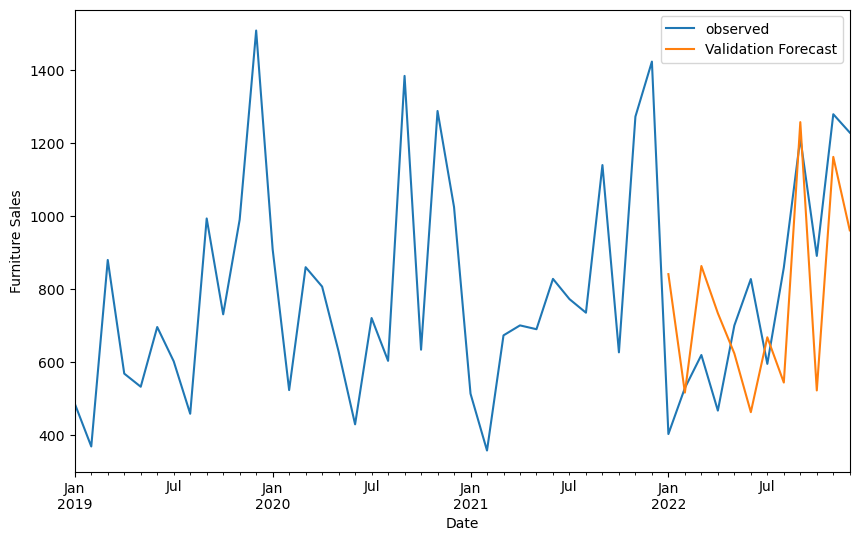

In [67]:
#pred = model.get_prediction(start=pd.to_datetime("2017-02-01")) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()


In [68]:
pred.predicted_mean

2022-01-01     839.940095
2022-02-01     515.487515
2022-03-01     862.167149
2022-04-01     732.892647
2022-05-01     622.636958
2022-06-01     461.938268
2022-07-01     666.988364
2022-08-01     542.990726
2022-09-01    1256.192198
2022-10-01     521.399276
2022-11-01    1160.958271
2022-12-01     959.784736
Freq: MS, Name: predicted_mean, dtype: float64

In [69]:
Y_pred = pred.predicted_mean
Y_test = y['2022-01-01':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

256.3828726029514


In [131]:
pred.predicted_mean.to_excel("TimeSeriesOutput_ARIMA.xlsx",header="Sales",index=True)

In this project, we successfully implemented a time series forecasting model using the ARIMA technique to predict future furniture sales based on historical data. After preprocessing the data, grouping by date, and building the ARIMA model, we generated forecasts and exported the results for further analysis.  


This forecast can help businesses in the furniture sector to make informed decisions related to inventory planning, marketing strategies, and supply chain manageme.  



Further improvements can include incorporating seasonality with SARIMA, or external factors (like promotions or holidays) using SARIMAX. Visualizing the forecast vs actuals would also enhance interpretabilomplet